**matplotlib**: "A 2D plotting library producing publication quality figures." We will primarily be using matplotlib to load and view images throughout this course. While there are other packages out there for visualization such as Altair, we don't need too many extra gizmos for simply loading and viewing an image.

**scikit-image (skimage)**: "A collection of algorithms for image processing." While matplotlib allows us to view images, it doesn't have the tools to manipulate images or perform analyses on them.

Welcome to Image Analysis for Scientists and Engineers! I am excited to hopefully help you feel a little more comfortable working with image datasets this quarter. We just took a look at the wide variety of fields that use images as a form of data. But images may be intimidating the moment you want to go from just a pretty picture or perhaps a qualitative analysis to actual numbers. How to do that?

We will look at three different "levels" of working with images, each with different kinds of outputs:

**Image processing**: image --> image. Primitive operations such as noise reduction, contrast enhancement and image sharpening. Note: **be careful here**. Some of these steps in the wrong context can be scientific misconduct. But used appropriately, they can be helpful for downstream analysis steps, or perhaps all you want is a pretty picture ;)

**Image analysis**: image --> attributes, numbers. Tasks such as segmentation (partitioning in image into regions or objects), description of those objects, and classification (recognition) of individual objects. Example attributes may be edges, contours, and identity of individual objects.

**Computer vision/AI**: image --> "sight". "Making sense" of an ensemble of recognized objects.

This course will focus on the first two tasks. By the end of today, you should be able to do a few simple image processing and analysis tasks using the tools provided by `matplotlib` and `skimage`.

In [27]:
import matplotlib.pyplot as plt
from skimage import data
import numpy as np

Let's try loading an image that comes with the `skimage` package:

(-0.5, 511.5, 511.5, -0.5)

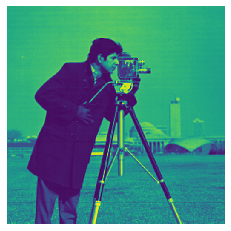

In [6]:
im = data.camera()

plt.imshow(im)
plt.axis('off')

You are going to use `plt.imshow` *a lot*. It's the standard function to load images. What if you wanted to change the size of the displayed image? Zoom in or out? We can do that by switching to the object-oriented syntax with a new function `plt.subplots`:

(-0.5, 511.5, 511.5, -0.5)

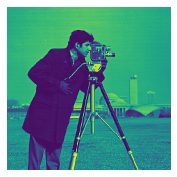

In [8]:
fig, ax = plt.subplots(figsize=(3,3))

ax.imshow(im)
ax.axis('off')

The `subplots` function creates two objects: `fig` and `ax`. The `ax` object controls most of the things we're interested in, but you will use the `fig` object for a few key items, such as saving the figure to a file. `fig` controls the entire figure, while `ax` controls individual graphs or images within the figure. As we only have one image in the figure, we only have one image to work with. We could easily put two figures in though:

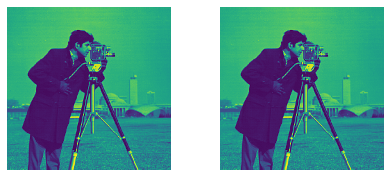

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(7,3))

for ax in axes:
    ax.imshow(im)
    ax.axis('off')

The image itself is a black and white image, but `matplotlib` seems to colorize it by default. You can change the color scheme by specifying a color map controlled by the `cmap` attribute:

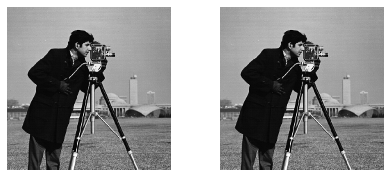

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(7,3))

for ax in axes:
    ax.imshow(im, cmap='gray')
    ax.axis('off')

Try out a few different color schemes! You can find a list [here](https://matplotlib.org/tutorials/colors/colormaps.html).

How did I know this was supposed to be a black and white image? You can tell by the `shape` of the object:

In [13]:
im.shape

(512, 512)

The shape of an image tells you a few things: the size of an image (in this case 512 pixels by 512 pixels) and the color scheme. A black and white image will be an (n x m x 1) array, while a color image represented in RGB space will by represented by a (n x m x 3) array. Take a look at the `coffee` image in the skimage dataset, and see what you learn about it.

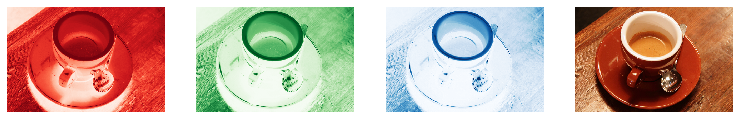

In [20]:
im2 = data.coffee()

fig, axes = plt.subplots(1, 4, figsize=(13,3))
colors = ['Reds', 'Greens', 'Blues', 'color']

for i, ax in enumerate(axes):
    if i < 3:
        ax.imshow(im2[:, :, i], cmap=colors[i])
    else:
        ax.imshow(im2)
    ax.axis('off')

The value of an individual pixel represents its intensity. Digital images are at their most basic level matrices of intensity values. Remember that when working with some of your datasets: just because an image is displayed in green or red doesn't mean that there is really any color associated with the data. Oftentimes in microscopy, images are represented by the color of their fluorophore as a mental help for the researcher.

There are a few tools you can use with `matplotlib` to change how an image appears without altering the data itself. One you may want to do is alter the **contrast**. Mathematically what you do when you change the contrast is you fix what numerical value of intensity equals a white pixel and what numerical value equals a black pixel. The closer these two values are, the higher the contrast. You can change this with the `vmax` and `vmin` attributes in the `imshow` function.

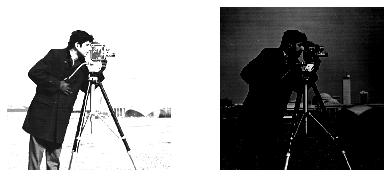

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(7,3))
vmins = [0, 150]
vmaxs = [100, 255]

for ax, vmin, vmax in zip(axes, vmins, vmaxs):
    ax.imshow(im, cmap='gray', vmin=vmin, vmax=vmax)
    ax.axis('off')

But what determines the min and max values of intensity of an image? Let's take a quick look at what the high and low are in the current image.

In [33]:
print('Max intensity of the image: {}'.format(np.max(im)))
print('Min intensity of the image: {}'.format(np.min(im)))

Max intensity of the image: 255
Min intensity of the image: 0


In this image, there are 256 or $2^8$ levels of intensity in the image. This is what is known as an 8-bit image. The more levels of intensity or shades that are present, the more data will be required to store the image. 16-bit images are also common giving 65536 different shades of grey.

Also of interest is the distribution of intensity values in an image. A useful way to represent this information is with a histogram. This can easily be done using `numpy`.

<BarContainer object of 26 artists>

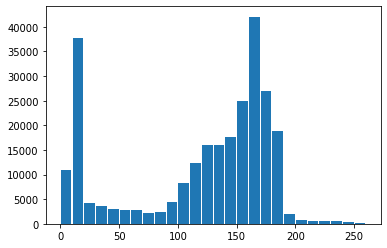

In [49]:
y, x = np.histogram(im, bins = np.linspace(0, 260, 27))

plt.bar(x[:-1]+5, y, width=9)

How could you manually reduce the number of shades by a factor of 8? By 32?

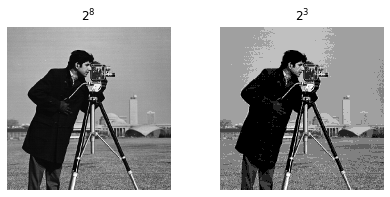

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(7,3))
ima = np.round(im/32)

for i, ax in enumerate(axes):
    if i == 0:
        ax.imshow(im, cmap='gray')
        ax.set_title(r'$2^8$')
    else:
        ax.imshow(ima, cmap='gray', vmin=0, vmax=8)
        ax.set_title(r'$2^3$')
    ax.axis('off')

**In-class exercises**

1. Try loading in one of your own images using the `im.read` function. Look at the inputs to the function. What can you change when loading the image?
2. Try a few of the operations we have performed above on your own sample image.
3. We looked at how to manually reduce the color resolution of an image above. In reality, this wouldn't reduce the storage size of the image, because the file is still saved as a 8-bit image. You can, however, try reducing the image size by reducing the image resolution. Try changing the resolution of your image using the `rescale` or `resize` functions in the `transform` module. What is the difference between these two functions? 